<a href="https://colab.research.google.com/github/pranavkantgaur/Coursera_DL_specialization_from_scratch/blob/master/course1/week2/logistic_regression_with_nn_mindset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np # linear algenbra
import matplotlib.pyplot as plt # plotting
import h5py # data loading for hdf5 dataset
from PIL import Image # for loading your images for processing
from scipy import ndimage 
#from lr_utils import load_dataset

In [3]:
!ls

drive  sample_data


## Problem statement
a training set of m_train images, labeled as cat (y =1) or not-cat (y = 0).
a test set of m_test_images
each image is of shape (num_px, num_px, 3), RGB channels 


In [0]:
# implementing utility function for loading cat vs non-cat datasets
def load_dataset():
  train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
  test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
  train_set_x = np.array(train_dataset["train_set_x"][:])
  train_set_y = np.array(train_dataset["train_set_y"][:])
  test_set_x  = np.array(test_dataset["test_set_x"][:])
  test_set_y = np.array(test_dataset["test_set_y"][:])
  classes = np.array(train_dataset["list_classes"][:])

  # lets reshape the arrays
  train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
  test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

  return train_set_x, train_set_y, test_set_x, test_set_y, classes

In [0]:
# load training dataset
x_train_images, y_train_images, x_test_images, y_test_images, classes = load_dataset()
# x_train_images: (m, nx, ny, nc)
# y_train_images: (1, m)

y =  1 Its a cat picture!!


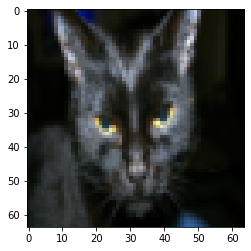

In [6]:
# lets inspect the dataset
image_id = 25
plt.imshow(x_train_images[image_id])
print("y = ", y_train_images[0][image_id], "Its a " + classes[y_train_images[0][image_id]].decode("utf-8") + " picture!!")

In [7]:
# lets inspect the shapes of the dataset arrays
print("Training set shape: ", x_train_images.shape) #  m, nx, ny, nc
print("Training set labels shape: ", y_train_images.shape) # 1, m
print("Test set shape: ", x_test_images.shape)
print("Test set labels shape: ", y_test_images.shape)
print("Each image is of shape: ", x_train_images[0].shape)

Training set shape:  (209, 64, 64, 3)
Training set labels shape:  (1, 209)
Test set shape:  (50, 64, 64, 3)
Test set labels shape:  (1, 50)
Each image is of shape:  (64, 64, 3)


In [8]:
# Lets flatten the train and test image dataset for training
x_train_images_flattened = x_train_images.reshape((x_train_images.shape[0], x_train_images.shape[1] * 
                                                   x_train_images.shape[2] * 
                                                   x_train_images.shape[3], 1)) 
x_train_images_flattened = np.squeeze(x_train_images_flattened)
x_train_images_flattened = x_train_images_flattened.T
x_test_images_flattened = x_test_images.reshape((x_test_images.shape[0], x_train_images.shape[1] * 
                                                 x_test_images.shape[2] * 
                                                 x_test_images.shape[3], 1))

x_test_images_flattened = np.squeeze(x_test_images_flattened)
x_test_images_flattened = x_test_images_flattened.T

# lets print
print("Flattened version of train images: ", x_train_images_flattened.shape)
print("Label set for training dataset: ", y_train_images.shape)
print("Flattened version of test images: ", x_test_images_flattened.shape)
print("Label set for test dataset: ", y_test_images.shape)


print("Sanity check after reshaping: ", x_train_images_flattened[0:5, 0])

Flattened version of train images:  (12288, 209)
Label set for training dataset:  (1, 209)
Flattened version of test images:  (12288, 50)
Label set for test dataset:  (1, 50)
Sanity check after reshaping:  [17 31 56 22 33]


In [0]:
# normalization
x_train_images = x_train_images_flattened / 255.0
x_test_images = x_test_images_flattened / 255.0

## Time to design architecture for Cat vs non-Cat problem
A logistic unit(forward calculations):
\begin{equation*}
z^{(i)} = w^{T}x^{(i)} + b
\end{equation*}
\begin{equation*}
y' = a^{(i)} = sigmoid(z^{(i)})
\end{equation*}
\begin{equation*}
L(y'^{(i)}, y^{(i)}) = - y ^{(i)} log(y'^{i}) - (1 - y^{(i)})log(1 - y'^{(i)})
\end{equation*}

The main steps for building a Neural Network are:

    Define the model structure (such as number of input features)
    Initialize the model's parameters
    Loop:
        Calculate current loss (forward propagation)
        Calculate current gradient (backward propagation)
        Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call model().

In [0]:
def sigmoid(z):
  sigm = 1 / (1 + np.exp(-1.0 * z))
  return sigm

In [76]:
# create model class
class CatvsNoncatClassifier(object):
  def __init__(self, input_size, num_hidden_units = 1):
    self.n_hidden_units = num_hidden_units
    self.w = np.zeros((self.n_hidden_units, input_size), dtype = 'float32')
    self.b = np.zeros((self.n_hidden_units, 1), dtype = 'float32')
    self.build_model()
  
  def build_model(self): # not required here since foward_prop and back_prop will 
    None                 # do that
    
   
  def initialize_parameters(self, x_shape):
    # init w and b
    self.w = np.zeros((self.n_hidden_units, x_shape), dtype = 'float32')
    self.b = np.zeros((self.n_hidden_units, 1), dtype = 'float32')
  
  def forward_propogation(self, x):
    z = np.dot(self.w, x) + self.b
    y_predicted = sigmoid(z)
    return y_predicted

  def compute_cost(self, y_predicted, y_ground):
    
    L = -1.0 * np.mean(np.dot(y_ground, np.log(y_predicted).T) + np.dot((1 - y_ground), np.log(1 - y_predicted).T)) # cross entropy loss
    #L = np.mean(np.square(np.abs(y_ground - y_predicted))) # mean square loss
    return L    

  def backward_propogation(self, x, y_predicted, y_ground):
    dw = (y_predicted - y_ground) * x.T
    db = (y_predicted - y_ground) 
    #print("shape of y_ground: ", y_ground.shape)
    #print("shape of y_predicted: ", y_predicted.shape)
    #print("value of dw: ", dw)
    #print("value of db: ", db)
    return dw, db # both are vectors

  def update_parameters(self, dw, db, learning_rate):     
    self.w = self.w - learning_rate * dw
    self.b = self.b - learning_rate * db
    
    
  def train_model(self, x, y_ground, learning_rate = 0.001, n_training_epochs = 10):
    self.initialize_parameters(x.shape[0])
    
    for i in range(n_training_epochs): # no concept of mini-batch yet.
      predictions = [] # for collecting predictions across an epoch
      ground_truths = []
      for j in range(x.shape[1]): # for each training example
        x_sample = x[:, j]
        x_sample = x_sample.reshape(x_sample.shape[0], 1)
        y_sample  = y_ground[:, j]
        y_sample = y_sample.reshape(1, y_sample.shape[0])

        y_predicted = self.forward_propogation(x_sample) 
 
        dw, db = self.backward_propogation(x_sample, y_predicted, y_sample)
        self.update_parameters(dw, db, learning_rate)
        predictions.append(y_predicted)
        ground_truths.append(y_sample)

      predictions_array = np.asarray(predictions).reshape(1, len(predictions))
      ground_truths_array = np.asarray(ground_truths).reshape(1, len(ground_truths))
      print("Loss value at epoch: ", i, " is: ", self.compute_cost(predictions_array, 
                                                              ground_truths_array))        
   
  def evaluate_model(self, x_test, y_test):
     predictions = []
     grounds = []
     for i in range(x_test.shape[1]):
       y_predicted = self.forward_propogation(x_test[:, i])
       predictions.append(y_predicted)
       grounds.append(y_test[:, i])
     print("Accuarcy of the trained model: ", 100 - np.mean(np.abs(np.asarray(predictions).reshape(len(predictions), 1) 
                                                                  - np.asarray(grounds).reshape(len(grounds), 1)))
                                                                  * 100, "%")
           
# main function
if __name__ == '__main__':
  # data(train and test) has already being loaded and preprocessed
  classifier = CatvsNoncatClassifier(num_hidden_units=1, input_size = x_train_images.shape[0])
  classifier.train_model(x_train_images, y_train_images, learning_rate = 0.001,
                         n_training_epochs = 200)
  classifier.evaluate_model(x_test_images, y_test_images)

Loss value at epoch:  0  is:  172.67465539419584
Loss value at epoch:  1  is:  153.07508678339286
Loss value at epoch:  2  is:  139.87019120893837
Loss value at epoch:  3  is:  129.5436223288432
Loss value at epoch:  4  is:  120.89926346821768
Loss value at epoch:  5  is:  113.33168851051317
Loss value at epoch:  6  is:  106.56085946765333
Loss value at epoch:  7  is:  100.47693690754473
Loss value at epoch:  8  is:  95.01303113840586
Loss value at epoch:  9  is:  90.10431842037471
Loss value at epoch:  10  is:  85.6855622233918
Loss value at epoch:  11  is:  81.69464724477132
Loss value at epoch:  12  is:  78.07500344002648
Loss value at epoch:  13  is:  74.77669608260902
Loss value at epoch:  14  is:  71.75664815869027
Loss value at epoch:  15  is:  68.97830963375307
Loss value at epoch:  16  is:  66.41100337166134
Loss value at epoch:  17  is:  64.029128163288
Loss value at epoch:  18  is:  61.81134503214609
Loss value at epoch:  19  is:  59.73982133101082
Loss value at epoch:  20  